In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

df = pd.read_csv("C:/Users/HP/Desktop/Python Docs/Python learning/Loan Prediction- Training set.csv", index_col="Loan_ID")

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\HP\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
plot(arange(5))

In [ ]:
df.head(10)

In [ ]:
df.describe()

In [ ]:
df['Education'].value_counts()

In [ ]:
    df['ApplicantIncome'].hist(bins=50)

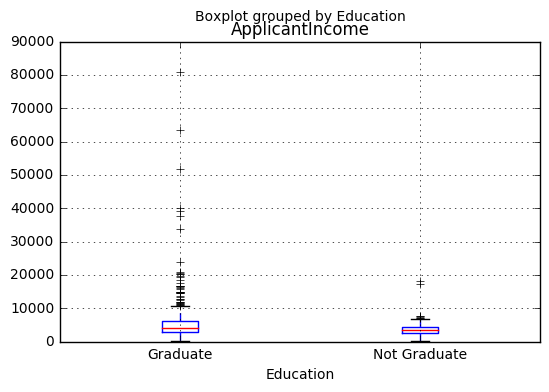

In [3]:
df.boxplot(column='ApplicantIncome', by = 'Education')

In [7]:
df.loc[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


In [8]:
def num_missing(x):
    return  sum(x.isnull())
#Applying per column:

print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [9]:
#Applying for each row

print("Missing values per row")
print(df.apply(num_missing, axis=1).head())

Missing values per row
Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


In [ ]:
impute_grps = df.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
print (impute_grps)

In [ ]:
pd.crosstab(df['Credit_History'],df["Loan_Status"],margins=True)

In [10]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [11]:
data_merged = df.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)


Property_Area  rates
Rural          1000     179.0
Semiurban      5000     233.0
Urban          12000    202.0
Name: Credit_History, dtype: float64

In [50]:
#Binning using the cut function in pandas


def binning(col, cut_points, labels=None):
    minval = col.min()
    maxval = col.max()

    #create list by adding min and max to cut_points
    
    break_points = [minval] + cut_points + [maxval]
        
    if not labels:
        labels = range(len(cut_points)+1)
    
    #Binning using cut function in pandas
    colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
    return colBin

        
#Binning age:

cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
df["LoanAmount_Bin"] = binning(df["LoanAmount"], cut_points, labels)
print(pd.value_counts(df["LoanAmount_Bin"], sort=False))


low          104
medium       284
high         135
very high     91
Name: LoanAmount_Bin, dtype: int64


In [ ]:
labels = range(len(cut_points)+1)
print(labels)

In [51]:
#Coding Nominal Data


def coding(col, Dict):
    colCoded = pd.Series(col, copy=True)
    for key, value in Dict.items():
        colCoded.replace(key, value, inplace=True)
    return colCoded

#Coding loan status Y as 1 and N as 0

print ('Before Coding:')
print (pd.value_counts(df["Loan_Status"]))
df["Loan_Status_Coded"] = coding(df["Loan_Status"], {'N':0,'Y':1})
print ('\nAfter Coding:')
print (pd.value_counts(df["Loan_Status_Coded"]))

Before Coding:
1    422
0    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


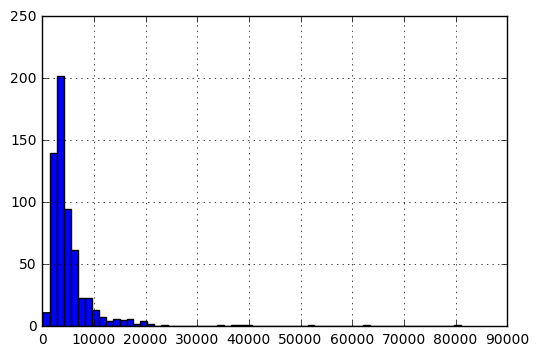

In [14]:
# A sample predictive model 
###########################
###########################

# Preliminary Analysis

df['ApplicantIncome'].hist(bins=60)




In [ ]:
df.boxplot(column = 'ApplicantIncome')

In [ ]:
df.boxplot(column = 'ApplicantIncome', by = 'Education')

In [ ]:
df['LoanAmount'].hist(bins=50)

In [ ]:
df.boxplot(column='LoanAmount', by='Education')

In [15]:
pivot = df.pivot_table(values=["Loan_Status"], index = ["Credit_History"], aggfunc = lambda x: x.map({'Y':1,'N':0}).mean())
print (pivot)
temp1 = df['Credit_History'].value_counts(ascending=True)
print(temp1)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')



In [ ]:
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
pivot.plot(kind = 'bar')

In [ ]:
temp3 = pd.crosstab(df['Credit_History'], ['Loan_Status'])

In [ ]:
print(temp3)

In [ ]:
temp3.plot(kind="bar", stacked=True, color= ['red', 'blue'], grid=False)

In [ ]:
print("NA")

In [ ]:
df.head(10)

In [16]:
#Data munging

# Checking for missing values. axis=0 checks for missing values by column

df.apply(lambda x: sum(x.isnull()), axis=0)

#by row

df.apply(lambda x: sum(x.isnull()), axis=1).head(10)

Loan_ID
LP001002    2
LP001003    0
LP001005    0
LP001006    0
LP001008    0
LP001011    0
LP001013    0
LP001014    0
LP001018    0
LP001020    0
dtype: int64

In [17]:
# Imputation of Loan Amount

# Imputation method: Based on median values of Loan_Amount 
table = df.pivot_table(values='LoanAmount', index = ['Self_Employed','Education'], aggfunc=np.median)

In [104]:
print(table)

Self_Employed  Education   
No             Graduate        130.0
               Not Graduate    113.0
Yes            Graduate        157.5
               Not Graduate    130.0
Name: LoanAmount, dtype: float64


In [18]:
# Imputation method: Based on median values of Loan_Amount 
table2 = df.pivot_table(values='Self_Employed', index = ['Credit_History','Education'], aggfunc='count')
print(table2)

Credit_History  Education   
0.0             Graduate         62
                Not Graduate     26
1.0             Graduate        361
                Not Graduate     89
Name: Self_Employed, dtype: int64


In [19]:
for i,row in df.loc[df['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Self_Employed'],row['Education']])
    print(ind)

('No', 'Graduate')
('No', 'Graduate')
('No', 'Graduate')
('Yes', 'Graduate')
(nan, 'Graduate')
('No', 'Graduate')
('No', 'Graduate')
('Yes', 'Graduate')
('No', 'Graduate')
('No', 'Not Graduate')
('No', 'Graduate')
('No', 'Not Graduate')
('No', 'Not Graduate')
('No', 'Not Graduate')
('No', 'Not Graduate')
('No', 'Graduate')
('No', 'Graduate')
('No', 'Graduate')
('No', 'Graduate')
('Yes', 'Graduate')
('No', 'Not Graduate')
('No', 'Not Graduate')


In [20]:
print("AN")


AN


In [21]:
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
dtype: int64


In [22]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
#Checking dependent variable (Loan Status) distribution based on Self_Employed

table3 = df.pivot_table(values='Self_Employed', index = ['Loan_Status','Education'], aggfunc='count')
print(table3)
pd.crosstab(df['Self_Employed'],df["Loan_Status"],margins=True)


Loan_Status  Education   
N            Graduate        132
             Not Graduate     51
Y            Graduate        322
             Not Graduate     77
Name: Self_Employed, dtype: int64


Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [24]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(df["Self_Employed"],df["Loan_Status"],margins=True).apply(percConvert, axis=1)

Loan_Status,N,Y,All
Self_Employed,,,
No,0.314000,0.686000,1.0
Yes,0.317073,0.682927,1.0
All,0.314433,0.685567,1.0


In [25]:
# We can use mode to replace missing values in Self_Employed as more than 86% values are 'No'. Plus the distribution of Loan Status 
#is similar across both levels of Self_Employed

df['Self_Employed'].fillna('No',inplace=True)
df['Self_Employed'].value_counts()
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
dtype: int64


In [26]:
for i,row in df.loc[df['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([row['Self_Employed'],row['Education']])
    df.loc[i,'LoanAmount'] = table.loc[ind]
    
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
dtype: int64


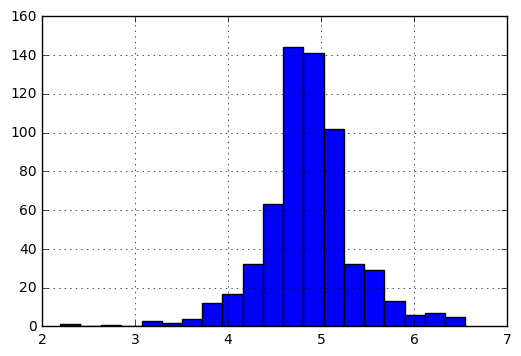

In [27]:
#Loan amount has some extreme values. Since they might be practically possible, we nullify their effect through taking log
#transformation of the same variable


df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

# As we can see, data follows normal distribution

In [ ]:
df['LoanAmount'].hist(bins=20)

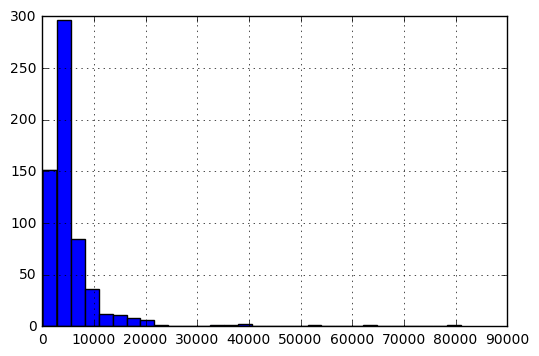

In [28]:
#analyzing Applicant Income & co-applicant income variables

df['ApplicantIncome'].hist(bins=30)
 # data is very skewed
    


In [ ]:
df['CoapplicantIncome'].hist(bins=30)
#Again data is very skewed

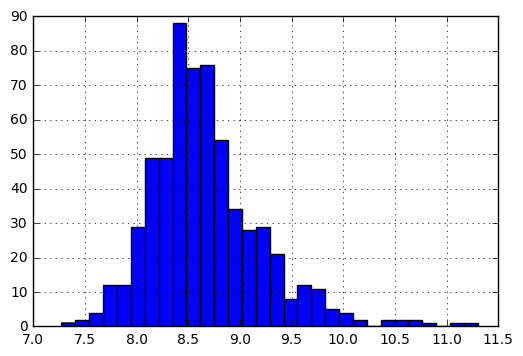

In [29]:
# Combining both to create a single Total Income variable and taking log of it

df['Total_Income']= df['ApplicantIncome'] + df['CoapplicantIncome']
df['Total_Incomelog']= np.log(df['Total_Income'])
df['Total_Incomelog'].hist(bins=30)

# Data looks normal now

In [30]:
#Checking missing values across columns again and Imputing other variables
    
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
LoanAmount_log        0
Total_Income          0
Total_Incomelog       0
dtype: int64


In [31]:
table4 = df.pivot_table(values='Loan_Status', index = ['Gender','Education'], aggfunc='count')
print(table4)
pd.crosstab(df['Gender'],df["Loan_Status"],margins=True)

# There seems to be no significant bias betweeen Gender and Loan approval


Gender  Education   
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Loan_Status, dtype: int64


Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [32]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [33]:
print(pd.value_counts(df["Gender"], sort=False))

Female    112
Male      489
Name: Gender, dtype: int64


In [35]:
df['Gender'] = df['Gender'].astype(category)

NameError: name 'category' is not defined

In [36]:
df.dtypes

Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
LoanAmount_Bin       category
Loan_Status_Coded       int64
LoanAmount_log        float64
Total_Income          float64
Total_Incomelog       float64
dtype: object

In [37]:
# In python, when producing pivot table output such as the one above, if a variable has missing values (coded as NaN), they're 
# excluded from the aggregated final pivot table. This produces misleaing results as the variable appears to have no
#missing values. We need to code all such missing values into a separate category like 'dummy' for instance to view them in output
df['Gender'].fillna('Dummy', inplace=True)


In [38]:

print(pd.value_counts(df["Gender"], sort=False))
table4 = df.pivot_table(values='Loan_Status', index = ['Gender','Education'], aggfunc='count')
print(table4)
pd.crosstab(df['Gender'],df["Loan_Status"],margins=True)

Female    112
Male      489
Dummy      13
Name: Gender, dtype: int64
Gender  Education   
Dummy   Graduate         12
        Not Graduate      1
Female  Graduate         92
        Not Graduate     20
Male    Graduate        376
        Not Graduate    113
Name: Loan_Status, dtype: int64


Loan_Status,N,Y,All
Gender,,,
Dummy,5,8,13
Female,37,75,112
Male,150,339,489
All,192,422,614


In [39]:
#Since only 2% of values are missing. We can use a blunt method such as mode imputation as it will not affect our resutls that much

print ('Before change:')
print (pd.value_counts(df["Gender"]))
df["Gender_Imputed"] = coding(df["Gender"], {'Dummy':'Male'})
print ('\nAfter Coding:')
print (pd.value_counts(df["Gender_Imputed"]))


Before change:
Male      489
Female    112
Dummy      13
Name: Gender, dtype: int64

After Coding:
Male      502
Female    112
Name: Gender_Imputed, dtype: int64


In [40]:
#Checking missing values across columns again and Imputing other variables
    
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column


Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
LoanAmount_log        0
Total_Income          0
Total_Incomelog       0
Gender_Imputed        0
dtype: int64


In [41]:
# Married, Dependents, Loan_Amount_Term and Credit_History have remaining missing values

print (pd.value_counts(df["Credit_History"]))
print (pd.value_counts(df["Dependents"]))
print (pd.value_counts(df["Loan_Amount_Term"]))
print (pd.value_counts(df["Married"]))

# Except Credit_History imputing mode/median for other variables should not be a problem. Credit_History has 50 missing values
# Imputing mode here might cause trouble with the data. We can try KNN algorithm here

#imputing the Married and Dependents variables with mode
from scipy.stats import mode
df['Married'].fillna('Yes',inplace=True)

1.0    475
0.0     89
Name: Credit_History, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [42]:
#Loan Amount Term is numeric. Using the pivot table based method as shown above


# Imputation method: Based on median values of Loan_Amount_Term 
table = df.pivot_table(values='Loan_Amount_Term', index = ['Self_Employed','Education', 'Gender'], aggfunc=np.median)
print(table)

Self_Employed  Education     Gender
No             Graduate      Dummy     360.0
                             Female    360.0
                             Male      360.0
               Not Graduate  Dummy     360.0
                             Female    360.0
                             Male      360.0
Yes            Graduate      Dummy     360.0
                             Female    360.0
                             Male      360.0
               Not Graduate  Female    360.0
                             Male      360.0
Name: Loan_Amount_Term, dtype: float64


In [43]:
for i,row in df.loc[df['Loan_Amount_Term'].isnull(),:].iterrows():
    ind = tuple([row['Self_Employed'],row['Education'], row['Gender']])
    df.loc[i,'Loan_Amount_Term'] = table.loc[ind]
    
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
LoanAmount_log        0
Total_Income          0
Total_Incomelog       0
Gender_Imputed        0
dtype: int64


In [ ]:
df.describe()

In [44]:
pd.crosstab(df['Dependents'],df["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Dependents,,,
0,107,238,345
1,36,66,102
2,25,76,101
3+,18,33,51
All,186,413,599


In [47]:
df['Dependents'] = df['Dependents'].astype(object)
from scipy.stats import mode


In [46]:
df['Dependents'].value_counts()
df['Dependents'].fillna('0',inplace=True)

In [48]:
print (df.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Bin       22
Loan_Status_Coded     0
LoanAmount_log        0
Total_Income          0
Total_Incomelog       0
Gender_Imputed        0
dtype: int64


In [80]:
# Building a KNN model to impute Credit_History

# Sample KNN from scratch
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
        return neighbors


import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)




In [81]:
#Test the getNeighbors function in PythonPython

trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

[[4, 4, 4, 'b']]


In [93]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Income,Total_Incomelog,Gender_Imputed
Loan_ID,,,,,,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,medium,1,4.867534,5849.0,8.674026,Male
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,0,4.852030,6091.0,8.714568,Male
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,low,1,4.189655,3000.0,8.006368,Male
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,medium,1,4.787492,4941.0,8.505323,Male
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,high,1,4.948760,6000.0,8.699515,Male
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,very high,1,5.587249,9613.0,9.170872,Male
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,medium,1,4.553877,3849.0,8.255569,Male
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,high,0,5.062595,5540.0,8.619750,Male
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,high,1,5.123964,5532.0,8.618305,Male


In [52]:
# Instead of the above we can directly use the KNN function from scikit learn

#NOTER: Scikit learn requires all input variables to be numeric. We should encode all variables as numeric before beginning
# any modeling approach

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status','LoanAmount_Bin','Gender_Imputed']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

df.dtypes 

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_Bin         int64
Loan_Status_Coded      int64
LoanAmount_log       float64
Total_Income         float64
Total_Incomelog      float64
Gender_Imputed         int64
dtype: object

In [53]:
#dropping redundant columns
df1 = df.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Loan_Status','Total_Income','Gender'], axis=1)
df1.head(10)

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Incomelog,Gender_Imputed
Loan_ID,,,,,,,,,,,,
LP001002,0,0,0,0,360.0,1.0,2,2,1,4.867534,8.674026,1
LP001003,1,1,0,0,360.0,1.0,0,2,0,4.852030,8.714568,1
LP001005,1,0,0,1,360.0,1.0,2,1,1,4.189655,8.006368,1
LP001006,1,0,1,0,360.0,1.0,2,2,1,4.787492,8.505323,1
LP001008,0,0,0,0,360.0,1.0,2,0,1,4.948760,8.699515,1
LP001011,1,2,0,1,360.0,1.0,2,3,1,5.587249,9.170872,1
LP001013,1,0,1,0,360.0,1.0,2,2,1,4.553877,8.255569,1
LP001014,1,3,0,0,360.0,0.0,1,0,0,5.062595,8.619750,1
LP001018,1,2,0,0,360.0,1.0,2,0,1,5.123964,8.618305,1


In [54]:
# All missing value records for Credit_History can be made into test data and rest as training data

df1_train = df1[np.isfinite(df1['Credit_History'])]
print (df1_train.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column




Married              0
Dependents           0
Education            0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_Bin       0
Loan_Status_Coded    0
LoanAmount_log       0
Total_Incomelog      0
Gender_Imputed       0
dtype: int64


In [55]:
df1_test = df1[df1.Credit_History.isnull()]
df1_test.head(10)

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Incomelog,Gender_Imputed
Loan_ID,,,,,,,,,,,,
LP001034,0,1,1,0,240.0,NaN,2,2,1,4.605170,8.187577,1
LP001052,1,1,0,0,360.0,NaN,1,0,0,5.017280,8.801168,1
LP001091,1,1,0,0,360.0,NaN,2,3,0,5.303305,8.927314,1
LP001123,1,0,0,0,360.0,NaN,2,1,1,4.317488,7.783224,1
LP001264,1,3,1,1,360.0,NaN,1,2,1,4.867534,8.612322,1
LP001273,1,0,0,0,360.0,NaN,1,3,0,5.579730,9.017968,1
LP001280,1,2,1,0,360.0,NaN,1,2,1,4.595120,8.581669,1
LP001326,0,0,0,0,360.0,NaN,2,2,0,4.867534,8.822027,1
LP001405,1,1,0,0,360.0,NaN,2,1,1,4.442651,8.192017,1


In [56]:
print (df1_test.apply(num_missing, axis=0))

Married               0
Dependents            0
Education             0
Self_Employed         0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
LoanAmount_Bin        0
Loan_Status_Coded     0
LoanAmount_log        0
Total_Incomelog       0
Gender_Imputed        0
dtype: int64


In [57]:
# We now have our test and training sets. We import KNN functions from Scikit

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')
# Setting predictor and target variables

predictor_var = ['Loan_Status_Coded','Education','Married','Self_Employed','Property_Area','Dependents','Loan_Amount_Term',
                 'LoanAmount_log','LoanAmount_Bin','Total_Incomelog','Gender_Imputed']
outcome_var ='Credit_History'



In [58]:
knn.fit(df1_train[predictor_var], df1_train[outcome_var]) 

predictions = knn.predict(df1_test[predictor_var])

In [59]:
print(predictions)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.
  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [60]:
#using the predictions and replacing NA values in Credit_History

df1_test['Predictions']= predictions
df1_test.head(10)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Incomelog,Gender_Imputed,Predictions
Loan_ID,,,,,,,,,,,,,
LP001034,0,1,1,0,240.0,NaN,2,2,1,4.605170,8.187577,1,1.0
LP001052,1,1,0,0,360.0,NaN,1,0,0,5.017280,8.801168,1,1.0
LP001091,1,1,0,0,360.0,NaN,2,3,0,5.303305,8.927314,1,1.0
LP001123,1,0,0,0,360.0,NaN,2,1,1,4.317488,7.783224,1,1.0
LP001264,1,3,1,1,360.0,NaN,1,2,1,4.867534,8.612322,1,1.0
LP001273,1,0,0,0,360.0,NaN,1,3,0,5.579730,9.017968,1,1.0
LP001280,1,2,1,0,360.0,NaN,1,2,1,4.595120,8.581669,1,1.0
LP001326,0,0,0,0,360.0,NaN,2,2,0,4.867534,8.822027,1,1.0
LP001405,1,1,0,0,360.0,NaN,2,1,1,4.442651,8.192017,1,1.0


In [61]:
df1_test.Credit_History = df1_test.Credit_History.fillna(value=df1_test.Predictions)



C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
df1_test.head(10)

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Incomelog,Gender_Imputed,Predictions
Loan_ID,,,,,,,,,,,,,
LP001034,0,1,1,0,240.0,1.0,2,2,1,4.605170,8.187577,1,1.0
LP001052,1,1,0,0,360.0,1.0,1,0,0,5.017280,8.801168,1,1.0
LP001091,1,1,0,0,360.0,1.0,2,3,0,5.303305,8.927314,1,1.0
LP001123,1,0,0,0,360.0,1.0,2,1,1,4.317488,7.783224,1,1.0
LP001264,1,3,1,1,360.0,1.0,1,2,1,4.867534,8.612322,1,1.0
LP001273,1,0,0,0,360.0,1.0,1,3,0,5.579730,9.017968,1,1.0
LP001280,1,2,1,0,360.0,1.0,1,2,1,4.595120,8.581669,1,1.0
LP001326,0,0,0,0,360.0,1.0,2,2,0,4.867534,8.822027,1,1.0
LP001405,1,1,0,0,360.0,1.0,2,1,1,4.442651,8.192017,1,1.0


In [63]:
df1_test_new = df1_test.drop(['Predictions'], axis=1)
df1_test_new.head(10)

,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Bin,Loan_Status_Coded,LoanAmount_log,Total_Incomelog,Gender_Imputed
Loan_ID,,,,,,,,,,,,
LP001034,0,1,1,0,240.0,1.0,2,2,1,4.605170,8.187577,1
LP001052,1,1,0,0,360.0,1.0,1,0,0,5.017280,8.801168,1
LP001091,1,1,0,0,360.0,1.0,2,3,0,5.303305,8.927314,1
LP001123,1,0,0,0,360.0,1.0,2,1,1,4.317488,7.783224,1
LP001264,1,3,1,1,360.0,1.0,1,2,1,4.867534,8.612322,1
LP001273,1,0,0,0,360.0,1.0,1,3,0,5.579730,9.017968,1
LP001280,1,2,1,0,360.0,1.0,1,2,1,4.595120,8.581669,1
LP001326,0,0,0,0,360.0,1.0,2,2,0,4.867534,8.822027,1
LP001405,1,1,0,0,360.0,1.0,2,1,1,4.442651,8.192017,1


In [64]:
# Appending the test set to the train set and creating an entire dataset for modeling


df_new = pd.concat([df1_train, df1_test_new])
print (df_new.apply(num_missing, axis=0))

Married              0
Dependents           0
Education            0
Self_Employed        0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_Bin       0
Loan_Status_Coded    0
LoanAmount_log       0
Total_Incomelog      0
Gender_Imputed       0
dtype: int64


In [65]:
#Checking if joing was properly done

print(pd.value_counts(df_new["Gender_Imputed"], sort=False))

# All values present. No we proceed to modeling

0    112
1    502
Name: Gender_Imputed, dtype: int64


In [83]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
        
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
        print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


In [84]:
  

model = LogisticRegression()
predictor_var = ['Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_Bin','LoanAmount_log','Total_Incomelog','Gender_Imputed']
classification_model(model, df_new, predictor_var, outcome_var)


Accuracy : 81.270%
Cross-Validation Score : 83.740%
Cross-Validation Score : 79.675%
Cross-Validation Score : 80.488%
Cross-Validation Score : 80.894%
Cross-Validation Score : 81.109%


In [85]:
#Fit the model again so that it can be refered outside the function:
model = LogisticRegression()
model.fit(df_new[predictor_var],df_new[outcome_var]) 
    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [89]:
print (model.intercept_, model.coef_)

[-0.04220906] [[  5.13652190e-01   5.49281915e-02  -3.81116935e-01   6.17754003e-03
   -7.03776778e-04   3.32239570e+00   5.08253065e-02  -1.50618928e-02
   -3.34472298e-01  -4.03006195e-02  -7.26122782e-02]]


In [87]:
print(model.feature_importances_)

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [91]:
# Testing a Random Forest
outcome_var = 'Loan_Status_Coded'
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area','LoanAmount_Bin','LoanAmount_log','Total_Incomelog','Gender_Imputed']
classification_model(model, df_new, predictor_var, outcome_var)
# THis model overfits a lot as shown by the 100% accuracy

Accuracy : 100.000%
Cross-Validation Score : 81.301%
Cross-Validation Score : 78.455%
Cross-Validation Score : 79.946%
Cross-Validation Score : 79.472%
Cross-Validation Score : 79.151%


In [93]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

Credit_History      0.260671
Total_Incomelog     0.246335
LoanAmount_log      0.206343
Property_Area       0.056612
Dependents          0.054325
Loan_Amount_Term    0.040135
LoanAmount_Bin      0.038902
Married             0.027417
Gender_Imputed      0.023717
Education           0.023326
Self_Employed       0.022217
dtype: float64


In [ ]:
# We can rerun our logisitc model using the top variables